In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [52]:
# Read data from files
x_i_raw = np.genfromtxt('./ass1_data/weightedX.csv', delimiter=',')
y_i = np.genfromtxt('./ass1_data/weightedY.csv', delimiter=',')
theta = np.array([0.00, 0.00])
m = x_i_raw.size
n = 0.5

# Normalize data
mean = 0
squared_sum = 0
for xi in x_i_raw:
    mean += xi
    squared_sum += xi*xi
mean = mean/m
e_x_squared = squared_sum/m
variance = e_x_squared - mean*mean

x_i_unnorm = np.array([[1, xi] for xi in x_i_raw])
x_i_norm = np.array([(xi-mean)/variance for xi in x_i_raw])
x_i = np.array([[1, xi] for xi in x_i_norm])

In [53]:
# Detect Convergence
epsilon = 0.00000001
def converged(theta_next, theta):
    converged = True
    for d in range(theta.size):
        converged = converged and abs(theta_next[d] - theta[d]) < epsilon
    return converged

In [54]:
# Gradient Descent
num_iterations = 0
total_iterations = 10

# Arrays ti hold parameter values for all iterations
theta_0, theta_1, error_func = [], [], []
curve = []

while(True):
    theta_next = np.array([0.00, 0.00])
    j_theta = 0
    for j in range(theta.size):
        sum = 0
        for i in range(m):
            hyp = np.dot(theta, x_i[i])
            sum = sum + x_i[i][j]*(y_i[i] - hyp)
            j_theta = j_theta + (y_i[i] - hyp)*(y_i[i] - hyp)
        theta_next[j] = theta[j] + n*sum/m
        
    if (converged(theta_next, theta)):
        break
        
    j_theta = j_theta/(4*m)
    theta_0.append(theta[0])
    theta_1.append(theta[1])
    error_func.append(j_theta)
    
    theta = theta_next
    num_iterations += 1
    
print (theta)
print (num_iterations)

[1.03128116 3.97888149]
718


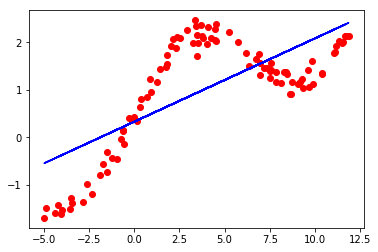

In [55]:
# Plot Graphs for PART A - Unweighted Linear Regression
h_theta = np.array([np.dot(theta, xi) for xi in x_i])
plt.plot(x_i_raw, y_i, 'ro')
plt.plot(x_i_raw, h_theta, 'b-')

In [56]:
# Function to give the predictions for the entire data set using locally weighted regression
def locally_weighted_plot(tau):
    prediction = []
    for x in x_i_unnorm:
        # Construct the weights matrix
        w_i = []
        for xi in x_i_unnorm:
            weight = math.exp(-np.dot(x-xi, x-xi)/(2*tau*tau))
            w_i.append(weight)
        w = np.diag(w_i)
        
        # Calculate theta for the given x
        x_transpose_w = np.dot(np.transpose(x_i_unnorm),w)
        theta_left = np.linalg.inv(np.dot(x_transpose_w, x_i_unnorm))
        theta_right = np.dot(x_transpose_w, y_i)
        theta = np.dot(theta_left, theta_right)
        
        # Add to the prediction array
        prediction.append(np.dot(theta, x))
        
    return (x_i_unnorm[:, [1]], prediction)

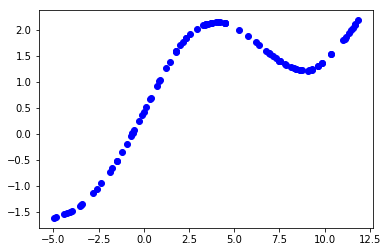

In [57]:
# Plot for PART B
tuple_1 = locally_weighted_plot(0.8)
plt.plot(tuple_1[0], tuple_1[1], 'bo')

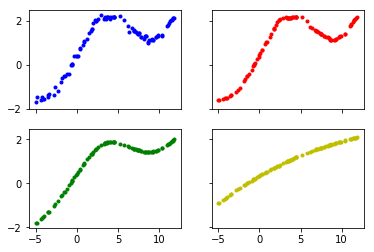

In [58]:
# Plot graphs for PART C
tuple_1 = locally_weighted_plot(0.1)
tuple_2 = locally_weighted_plot(0.3)
tuple_3 = locally_weighted_plot(2)
tuple_4 = locally_weighted_plot(10)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].plot(tuple_1[0], tuple_1[1], 'b.')
axs[0, 1].plot(tuple_2[0], tuple_2[1], 'r.')
axs[1, 0].plot(tuple_3[0], tuple_3[1], 'g.')
axs[1, 1].plot(tuple_4[0], tuple_4[1], 'y.')

plt.show()